In [ ]:
# install python modules
!pip install opencv-python3
!pip install transformers 
!pip install accelerate
!pip install diffusers

In [ ]:
from diffusers import StableDiffusionXLControlNetPipeline, ControlNetModel, AutoencoderKL
from diffusers.utils import load_image
import numpy as np
import torch

import cv2
from PIL import Image

In [4]:
# set prompt
prompt = "aerial view, a futuristic research complex in a bright foggy jungle, hard lighting"
negative_prompt = "low quality, bad quality, sketches"

In [5]:
# download an image
raw_image = load_image(
    "https://hf.co/datasets/hf-internal-testing/diffusers-images/resolve/main/sd_controlnet/hf-logo.png"
)

display(raw_image)

The path of a model, like "diffusers/controlnet-sdxl-1.0", is default to find the model from hugging face "https://huggingface.co/diffusers/controlnet-sdxl-1.0".
If a local model is expected, a absolute file path should be provided.

In [12]:
# initialize the models and pipeline
controlnet_conditioning_scale = 0.5  # recommended for good generalization
controlnet = ControlNetModel.from_pretrained("diffusers/controlnet-sdxl-1.0", torch_dtype=torch.float16)
vae = AutoencoderKL.from_pretrained("madebyollin/sdxl-vae-fp16-fix", torch_dtype=torch.float16)
pipe = StableDiffusionXLControlNetPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", controlnet=controlnet, torch_dtype=torch.float16
)
pipe.enable_model_cpu_offload()

# get canny image
canny_image = np.array(raw_image)
canny_image = cv2.Canny(canny_image, 100, 200)
canny_image = canny_image[:, :, None]
canny_image = np.concatenate([canny_image, canny_image, canny_image], axis=2)
canny_image = Image.fromarray(canny_image)

# generate image
image = pipe(
    prompt, 
    controlnet_conditioning_scale=controlnet_conditioning_scale, 
    image=canny_image
).images[0]

 18%|█▊        | 9/50 [00:05<00:23,  1.73it/s]

KeyboardInterrupt: 

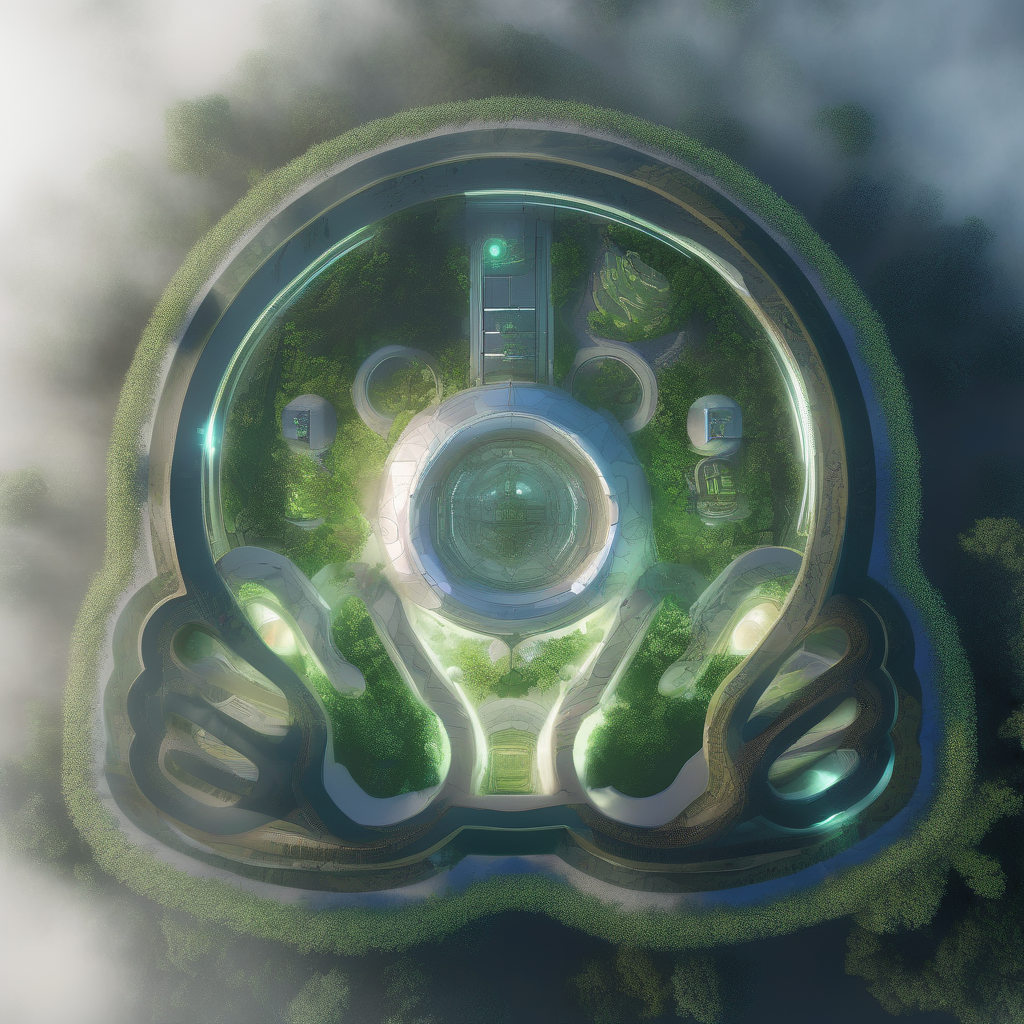

In [8]:
display(image)

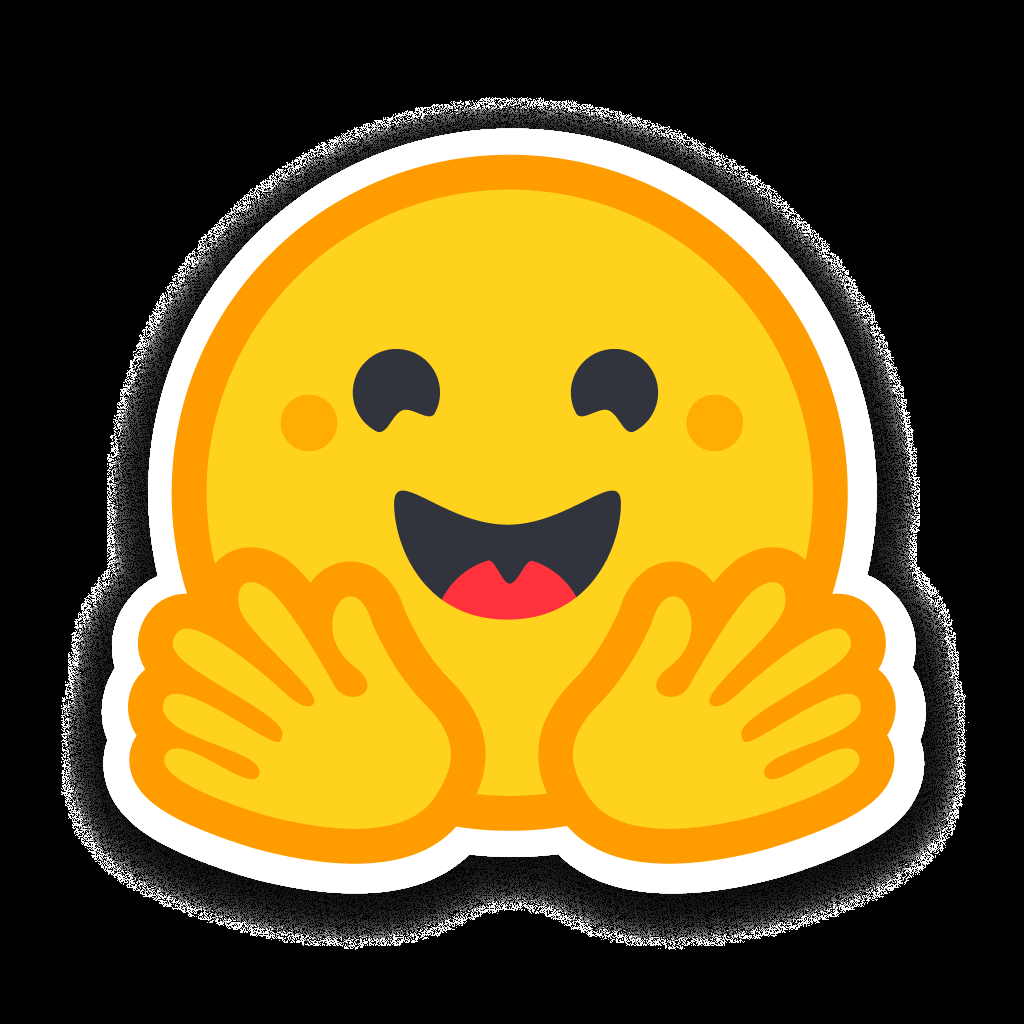

In [9]:
# download an image
raw_image = load_image(
    "https://hf.co/datasets/hf-internal-testing/diffusers-images/resolve/main/sd_controlnet/hf-logo.png"
)

display(raw_image)

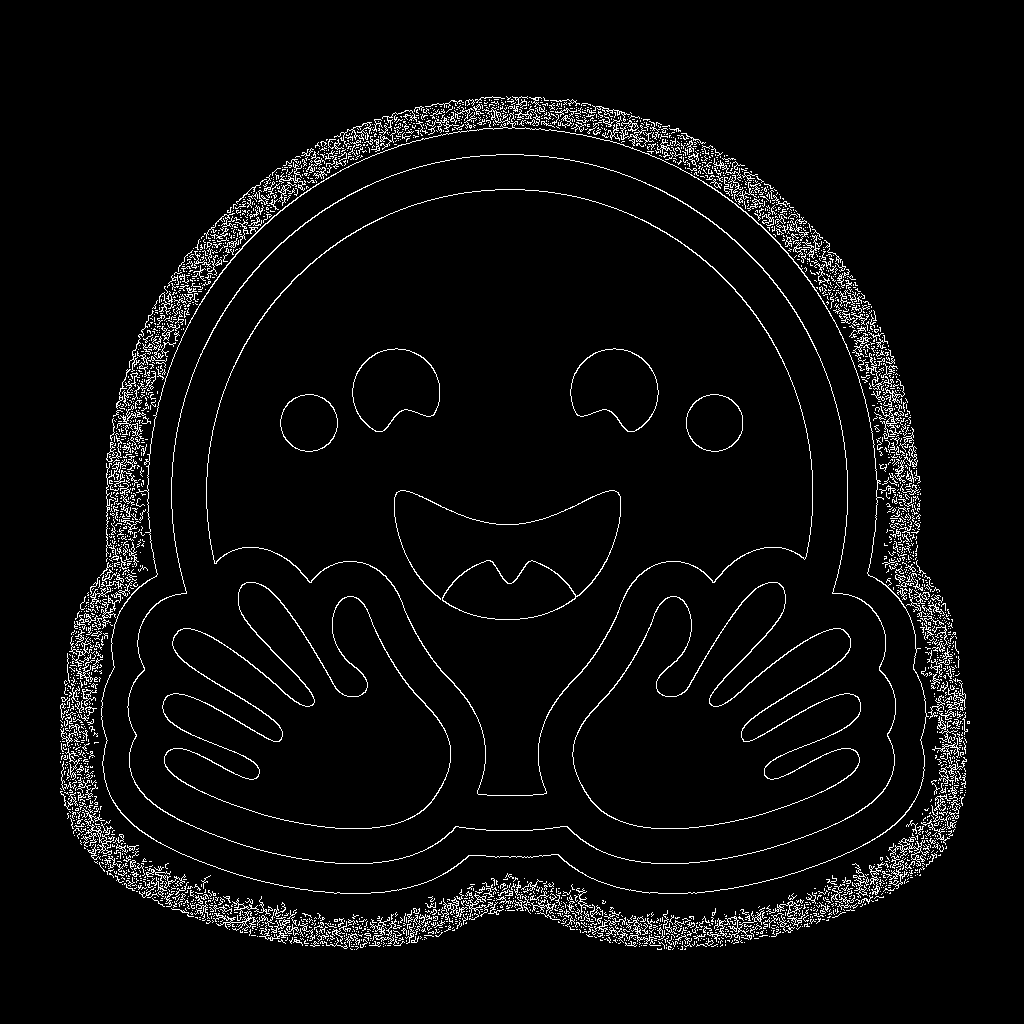

In [11]:
canny_image = np.array(raw_image)
canny_image = cv2.Canny(canny_image, 100, 200)
canny_image = canny_image[:, :, None]
canny_image = np.concatenate([canny_image, canny_image, canny_image], axis=2)
canny_image = Image.fromarray(canny_image)
display(canny_image)